# Pandas groupby

[5 tips for data aggregation in pandas](https://towardsdatascience.com/5-tips-for-data-aggregation-in-pandas-7eaa8476dc75)

In [202]:
import pandas as pd

# housekeeping
pd.set_option("display.precision", 4)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.max_rows", 25)

# Make up some data.
data = [
    {'unit': 'archer', 'building': 'archery_range', 'number_units': 1, 'civ': 'spanish', 'unit_price': 20},
    {'unit': 'archer', 'building': 'archery_range', 'number_units': 2, 'civ': 'huns', 'unit_price': 30},
    {'unit': 'militia', 'building': 'barracks', 'number_units': 2, 'civ': 'spanish', 'unit_price': 10},
    {'unit': 'pikemen', 'building': 'barracks', 'number_units': 3, 'civ': 'spanish', 'unit_price': 25},
    {'unit': 'pikemen', 'building': 'barracks', 'number_units': 4, 'civ': 'huns', 'unit_price': 10},
]
 
# Create the DataFrame.
df = pd.DataFrame(data)
# View the DataFrame.
df

building      civ  number_units     unit  unit_price
0  archery_range  spanish             1   archer          20
1  archery_range     huns             2   archer          30
2       barracks  spanish             2  militia          10
3       barracks  spanish             3  pikemen          25
4       barracks     huns             4  pikemen          10

In [203]:
# Create a new column to get the sales of each row
df["total_price"] = df["number_units"] * df["unit_price"]
df

building      civ  number_units     unit  unit_price  total_price
0  archery_range  spanish             1   archer          20           20
1  archery_range     huns             2   archer          30           60
2       barracks  spanish             2  militia          10           20
3       barracks  spanish             3  pikemen          25           75
4       barracks     huns             4  pikemen          10           40

**Get the number of transactions (rows) of each building** Here, each row represents a transaction. This means that the number of transactins is the same as counting the number of times each building appears in the dataset: `barracks` appears three times and `archery_range` appears two times.

In [32]:
df["building"].value_counts()

barracks         3
archery_range    2
Name: building, dtype: int64

In [35]:
df.groupby(["building"])["total_price"].agg("size")

building
archery_range    2
barracks         3
Name: total_price, dtype: int64

In [36]:
df.groupby(["building"])["total_price"].agg("count")

building
archery_range    2
barracks         3
Name: total_price, dtype: int64

**Get the number of sales of each building** There are many ways to do this:

In [26]:
df.groupby("building")["total_price"].agg("sum")

building
archery_range     80
barracks         135
Name: total_price, dtype: int64

In [27]:
df.groupby(["building"])["total_price"].agg("sum")

building
archery_range     80
barracks         135
Name: total_price, dtype: int64

In [28]:
df.groupby(["building"])[["total_price"]].agg("sum")

total_price
building                  
archery_range           80
barracks               135

**Note** There is a slight difference among the last three statements. Only the last one returns a dataframe. This means that the dataframe will be rendered as a table in the notebook. For this reason, I will statements like this one:

```
df.groupby(list_of_cols)[list_of_cols].agg(params)
```

where `list_of_cols` is a list of column names, likely with a single column name, like `["building"]`.



In [19]:
s1 = df.groupby("building")["total_price"].agg("sum")
s2 = df.groupby(["building"])["total_price"].agg("sum")
s3 = df.groupby(["building"])[["total_price"]].agg("sum")

print(type(s1))
print(type(s2))
print(type(s3))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Now, suppose you need to compute other statistics, like standard deviation or variance:

In [38]:
df.groupby(["building"])[["total_price"]].agg(["mean", "std", "var"])

total_price              
                     mean      std  var
building                               
archery_range          40  28.2843  800
barracks               45  27.8388  775

**Note** if there is a single row in any of the groups when computing `std`, you will get a `NaN`. See the following example:

In [200]:
# Make up some data.
data = [
    {'unit': 'archer', 'building': 'archery_range', 'number_units': 1, 'civ': 'spanish', 'unit_price': 20},
    #{'unit': 'archer', 'building': 'archery_range', 'number_units': 2, 'civ': 'huns', 'unit_price': 30},
    {'unit': 'militia', 'building': 'barracks', 'number_units': 2, 'civ': 'spanish', 'unit_price': 10},
    {'unit': 'pikemen', 'building': 'barracks', 'number_units': 3, 'civ': 'spanish', 'unit_price': 25},
    {'unit': 'pikemen', 'building': 'barracks', 'number_units': 4, 'civ': 'huns', 'unit_price': 10},
]

df_nan = pd.DataFrame(data)
df_nan.groupby(["building"])[["number_units"]].agg(["std"])

number_units
                       std
building                  
archery_range          NaN
barracks               1.0

**Get the building with the largest sales** The following statement give us the total sales for each building:

In [70]:
# the result is a DataFrame
df.groupby(["building"])[["total_price"]].agg("sum")

total_price
building                  
archery_range           80
barracks               135

Now, we want to get the building with the largest sales:

In [99]:
# we must use .nlargest(n, col_name) when using a dataframe
res = df.groupby(["building"])[["total_price"]].agg("sum").nlargest(1, "total_price")  
res

total_price
building             
barracks          135

Chances are you want to rename the column name from `total_price` to something else, like `total_sales`:

In [104]:
new_res = res.rename(columns={"total_price": "total_sales"})
new_res

total_sales
building             
barracks          135

**Note** The previous trick also works if the dataframe contains levels, ie, if the `df.columns` is not a simple list:

In [105]:
res.columns

Index(['total_price'], dtype='object')

In [110]:
res_multicol = df.groupby(["building"])[["total_price"]].agg(["sum"])
res_multicol

total_price
                      sum
building                 
archery_range          80
barracks              135

In [111]:
res_multicol.columns

MultiIndex(levels=[['total_price'], ['sum']],
           codes=[[0], [0]])

In the above case, we use `.agg(["sum"])` rather than `.agg("sum")`. As a result, the columns of `res_multicol` contains levels. We rename the column below:

In [112]:
res_multicol.rename(columns={"total_price": "total_sales"})

total_sales
                      sum
building                 
archery_range          80
barracks              135

There is another way to get the building with the largest sale. Rather than using a list of columns like `["building"]` and `["total_price"]`, we will use strings, that is, `"building"` and `"total_price"`, respectively:

In [73]:
# the result is a Serie
df.groupby("building")["total_price"].agg("sum")

building
archery_range     80
barracks         135
Name: total_price, dtype: int64

In [76]:
# we can use .nlargest(n) without specifying the column name as above
df.groupby("building")["total_price"].agg("sum").nlargest(1)

building
barracks    135
Name: total_price, dtype: int64

In [78]:
# I am not sure about this line
res = df.groupby("building")["total_price"].agg("sum").nlargest(1)
res.index[0]

'barracks'

Optionally, we can use `idxmax()` as recommended in [stackoverflow](https://stackoverflow.com/questions/39964558/pandas-max-value-index):

In [87]:
df.groupby("building")["total_price"].agg("sum").idxmax()

'barracks'

`idxmax()` also works with dataframes, but I find it more intuitive when using series:

In [90]:
df.groupby(["building"])[["total_price"]].agg("sum").idxmax()

total_price    barracks
dtype: object

**Group by two columns**

In [208]:
df.groupby(["building"])[["total_price"]].agg("sum")

total_price
building                  
archery_range           80
barracks               135

In [209]:
df.groupby(["building", "civ"])[["total_price"]].agg("sum")

total_price
building      civ                 
archery_range huns              60
              spanish           20
barracks      huns              40
              spanish           95

The resulting dataframe shows more information about `total_price`:
    
- `total_price = 80` comes from 60 (huns) and 20 (spanish)   
- `total_price = 135` comes from 40 (huns) and 95 (spanish)   
    

**Working with another dataset** Let's use another dataset to work with:

In [114]:
from seaborn import load_dataset
df = load_dataset("tips").rename(columns={"sex": "gender"})
df.head()

total_bill   tip  gender smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [135]:
# there are no null values
df.isnull().any(axis=0)

total_bill    False
tip           False
gender        False
smoker        False
day           False
time          False
size          False
dtype: bool

In [164]:
# 'tip' is a numeric feature. Let's create a new feature called 'tip_cat'
import numpy as np
df["tip_cat"] = pd.cut(df["tip"],
                       bins=[0., 1.9, 3.9, 5.9, 7.9, 9.9, np.inf],
                       labels=[1, 2, 3, 4, 5, 6])

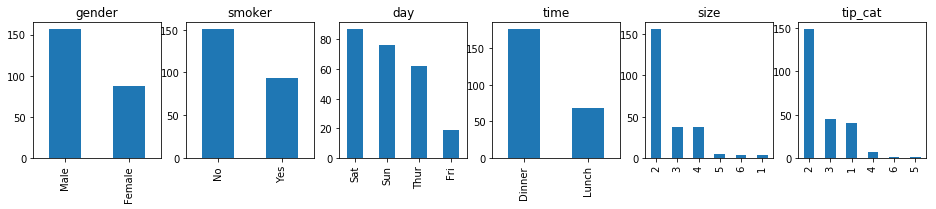

In [162]:
# lets plot the frequencies of the categorical features
import matplotlib.pyplot as plt
cols = ["gender", "smoker", "day", "time", "size", "tip_cat"]
fig, axes = plt.subplots(1, len(cols), figsize=(16, 2.5))

for col, ax in zip(cols, axes.flat):
    df[col].value_counts().plot(kind="bar", ax=ax, title=col)

We want to analyze the `"tip"` column. Let's begin with `.describe()`:

In [139]:
df[["tip"]].describe()

tip
count  244.0000
mean     2.9983
std      1.3836
min      1.0000
25%      2.0000
50%      2.9000
75%      3.5625
max     10.0000

In [163]:
df["tip_cat"].value_counts()

2    149
3     45
1     41
4      7
6      1
5      1
Name: tip_cat, dtype: int64

In [this post](https://towardsdatascience.com/5-tips-for-data-aggregation-in-pandas-7eaa8476dc75), you will find the following statement to get the largest two tips grouped by day:

In [178]:
df.groupby("day")["tip"].nlargest(2)

day      
Thur  141     6.70
      88      5.85
Fri   95      4.73
      93      4.30
Sat   170    10.00
      212     9.00
Sun   183     6.50
      47      6.00
Name: tip, dtype: float64

At first, the result is a bit confusing. Let's dig into it. First, create one dataframe for each day: `Sat`, `Sun`, `Thur`, `Fri`.

In [180]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [182]:
df_thur = df[df["day"] == "Thur"]
df_fri  = df[df["day"] == "Fri"]
df_sat  = df[df["day"] == "Sat"]
df_sun  = df[df["day"] == "Sun"]

Now, get the largest two tips for each dataframe:

In [184]:
df_thur["tip"].nlargest(2)

141    6.70
88     5.85
Name: tip, dtype: float64

In [187]:
df_fri["tip"].nlargest(2)

95    4.73
93    4.30
Name: tip, dtype: float64

In [186]:
df_sat["tip"].nlargest(2)

170    10.0
212     9.0
Name: tip, dtype: float64

In [185]:
df_sun["tip"].nlargest(2)

183    6.5
47     6.0
Name: tip, dtype: float64

Consider the tips obtained in Saturday. There are two rows: 

```
index    tip
170      10.0
212      9.0
```

This means that `df_sat["tip"][170]` contains the entry with the largest tip obtained in Saturday.

In [192]:
df_sat["tip"].index

Int64Index([ 19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
             32,  33,  34,  35,  36,  37,  38,  39,  40,  56,  57,  58,  59,
             60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
             73,  74,  75,  76, 102, 103, 104, 105, 106, 107, 108, 109, 110,
            111, 168, 169, 170, 171, 206, 207, 208, 209, 210, 211, 212, 213,
            214, 215, 216, 217, 218, 219, 227, 228, 229, 230, 231, 232, 233,
            234, 235, 236, 237, 238, 239, 240, 241, 242],
           dtype='int64')

In [ ]:
df_sat["tip"][0]  # this will cause an error

In [193]:
df_sat["tip"][170]

10.0

In [194]:
df_sat["tip"].idxmax()

170

Back to our example. The following line shows the two largest tips for each day (and their respective indices)

In [195]:
# idx and tip
df.groupby("day")["tip"].nlargest(2)

day      
Thur  141     6.70
      88      5.85
Fri   95      4.73
      93      4.30
Sat   170    10.00
      212     9.00
Sun   183     6.50
      47      6.00
Name: tip, dtype: float64

In [197]:
# idx only
df.groupby("day")["tip"].idxmax()

day
Thur    141
Fri      95
Sat     170
Sun     183
Name: tip, dtype: int64

In [198]:
# value only
df.groupby("day")["tip"].max()

day
Thur     6.70
Fri      4.73
Sat     10.00
Sun      6.50
Name: tip, dtype: float64

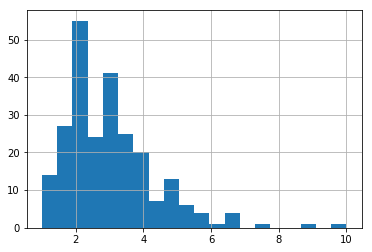

In [148]:
df["tip"].hist(bins=20);

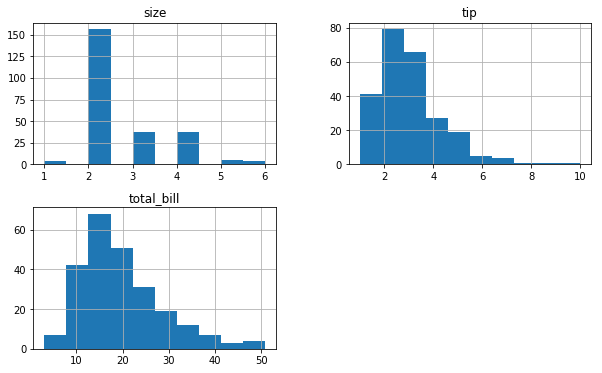

In [147]:
df.hist(bins=10, figsize=(10,6));

In [137]:
df.groupby("day")["to"]

# Ignore from here

In [75]:
res = df.groupby("building")["total_price"].agg("sum")
largest = res.nlargest(1)
largest

building
barracks    135
Name: total_price, dtype: int64

In [67]:
largest.index[0]

'barracks'

In [1]:
import pandas as pd
from seaborn import load_dataset

# housekeeping
pd.set_option("display.precision", 4)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.max_rows", 25)

df = load_dataset("tips").rename(columns={"sex": "gender"})
df.head()

total_bill   tip  gender smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [10]:
# use groupby() with describe() for group summary statistics
df.groupby("day")["tip"].describe()

count   mean    std   min    25%    50%    75%    max
day                                                        
Thur   62.0  2.771  1.240  1.25  2.000  2.305  3.362   6.70
Fri    19.0  2.735  1.020  1.00  1.960  3.000  3.365   4.73
Sat    87.0  2.993  1.631  1.00  2.000  2.750  3.370  10.00
Sun    76.0  3.255  1.235  1.01  2.037  3.150  4.000   6.50

In [14]:
# use agg()/aggregate() for flexible aggregations
df.groupby("day")[["tip"]].mean()

tip
day         
Thur  2.7715
Fri   2.7347
Sat   2.9931
Sun   3.2551

In [16]:
df.groupby("day")[["tip"]].agg(["mean", "std"])

tip        
        mean     std
day                 
Thur  2.7715  1.2402
Fri   2.7347  1.0196
Sat   2.9931  1.6310
Sun   3.2551  1.2349

In [17]:
df.groupby("day")[["tip"]].agg(["mean", "std"]).rename(columns={"mean": "avg", "std": "sd"})

tip        
         avg      sd
day                 
Thur  2.7715  1.2402
Fri   2.7347  1.0196
Sat   2.9931  1.6310
Sun   3.2551  1.2349

In [22]:
df.groupby("day")["tip"].agg([("avg", "mean"), ("sd", "std")])

avg      sd
day                 
Thur  2.7715  1.2402
Fri   2.7347  1.0196
Sat   2.9931  1.6310
Sun   3.2551  1.2349

In [24]:
df.groupby("day")[["tip", "size"]].agg(["mean", "std"])

tip            size        
        mean     std    mean     std
day                                 
Thur  2.7715  1.2402  2.4516  1.0663
Fri   2.7347  1.0196  2.1053  0.5671
Sat   2.9931  1.6310  2.5172  0.8193
Sun   3.2551  1.2349  2.8421  1.0073

In [2]:
# Make up some data.
data = [
    {'unit': 'archer', 'building': 'archery_range', 'number_units': 1, 'civ': 'spanish', 'unit_price': 20},
    {'unit': 'militia', 'building': 'barracks', 'number_units': 2, 'civ': 'spanish', 'unit_price': 10},
    {'unit': 'pikemen', 'building': 'barracks', 'number_units': 3, 'civ': 'spanish', 'unit_price': 25},
    {'unit': 'pikemen', 'building': 'barracks', 'number_units': 4, 'civ': 'huns', 'unit_price': 10},
]
 
# Create the DataFrame.
df = pd.DataFrame(data)
# View the DataFrame.
df

building      civ  number_units     unit  unit_price
0  archery_range  spanish             1   archer          20
1       barracks  spanish             2  militia          10
2       barracks  spanish             3  pikemen          25
3       barracks     huns             4  pikemen          10

In [30]:
df["total_price"] =  df["number_units"] * df["unit_price"]

In [31]:
df

building      civ  number_units     unit  unit_price  total_price
0  archery_range  spanish             1   archer          20           20
1       barracks  spanish             2  militia          10           20
2       barracks  spanish             3  pikemen          25           75
3       barracks     huns             4  pikemen          10           40

In [33]:
df.groupby("building")[["total_price"]].agg(["sum"])

total_price
                      sum
building                 
archery_range          20
barracks              135

In [44]:
df.groupby("building")[["total_price"]].agg(["sum"]).max()

total_price  sum    135
dtype: int64

In [38]:
type(res)

pandas.core.frame.DataFrame

In [ ]:
https://towardsdatascience.com/5-tips-for-data-aggregation-in-pandas-7eaa8476dc75

In [4]:
df.groupby(["time", "day"]).size().unstack()

day     Thur   Fri   Sat   Sun
time                          
Lunch   61.0   7.0   NaN   NaN
Dinner   1.0  12.0  87.0  76.0

In [5]:
pd.crosstab(df["time"], df["day"])

day     Thur  Fri  Sat  Sun
time                       
Lunch     61    7    0    0
Dinner     1   12   87   76

In [6]:
pd.crosstab(df["time"], df["day"], margins=True)

day     Thur  Fri  Sat  Sun  All
time                            
Lunch     61    7    0    0   68
Dinner     1   12   87   76  176
All       62   19   87   76  244

In [7]:
pd.crosstab(df["time"], df["day"], margins=True, normalize=True)

day      Thur    Fri    Sat    Sun    All
time                                     
Lunch   0.250  0.029  0.000  0.000  0.279
Dinner  0.004  0.049  0.357  0.311  0.721
All     0.254  0.078  0.357  0.311  1.000